<a href="https://colab.research.google.com/github/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/04_plotLossDanAkurasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# df = pd.read_csv('Iris.csv')
df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.drop(columns = 'Id')

In [5]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [6]:
new_df = pd.concat([df, category], axis = 1)
new_df = new_df.drop(columns = 'Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [8]:
X = dataset[:, 0:4]
y = dataset[:, 4:7]

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size = 0.3)

In [11]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape=(4,)),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

In [12]:
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
hist = model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1267 - accuracy: 0.2095
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.6381
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0642 - accuracy: 0.6952
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0368 - accuracy: 0.7048
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0103 - accuracy: 0.6952
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9822 - accuracy: 0.6857
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9541 - accuracy: 0.6571
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9236 - accuracy: 0.6571
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8936 - accuracy: 0.6571
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8622 - accuracy: 0.6571
Epoch 11/100
4/4 [===========

In [14]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0913 - accuracy: 1.0000


[0.09128562361001968, 1.0]

In [15]:
import matplotlib.pyplot as plt

Objek pyplot melakukan plot dari objek history. Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan.

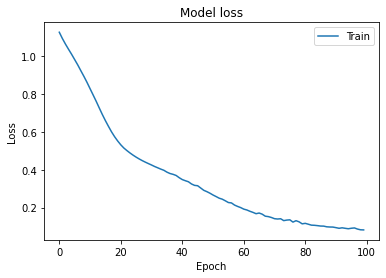

In [16]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

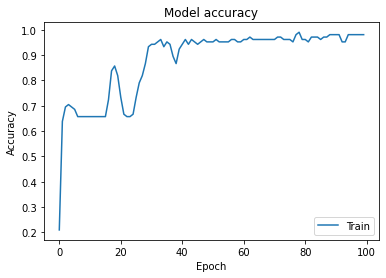

In [17]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()